При увеличении разрешения выходного файла, наш код начинает работать очень медленно, потому что использует двойной вложенный цикл для перебора всех пикселов. Пробуем оптимизировать код используя возможность numpy, который может одновременно оперировать всеми пикселами выходного файла как матрицей.     

(1+0j)
(-0.366+0.994j)
(0.884+0.994j)
(0.884-0.994j)
(-1.018-0.689j)
(-1.018+0.689j)
(-0.366-0.994j)
118


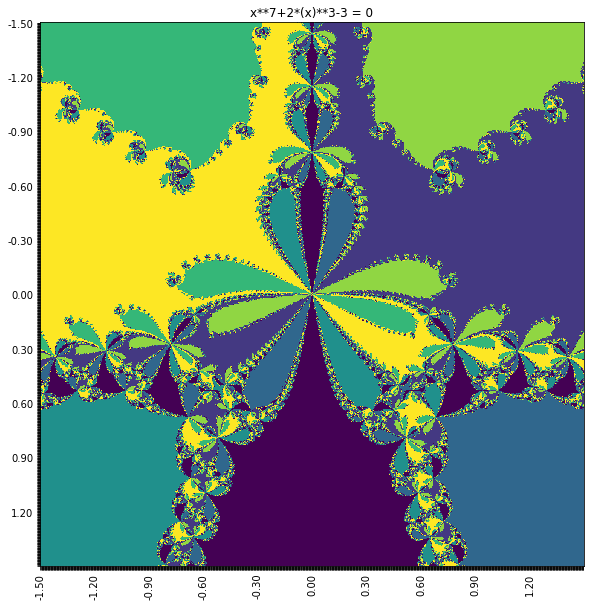

1

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
class func():
    eps_zero = 0.0000001
    round_factor = 3
    def roundcomp(self, c,pointsafterzero): #округление комплексного числа
        return round(c.real,pointsafterzero)+1j*round(c.imag,pointsafterzero)

    def __init__(self, formula, deriv):
        self.formula = formula
        self.deriv = deriv
        self.roots = [] #set empty list of roots, it will updated by method findingroots
    def f(self, x):
        return eval(self.formula)
    def d(self,x):
        return eval(self.deriv)
    def newton(self, x):
        if not( abs(self.f(x)) < self.eps_zero):
            x = x - self.f(x)/self.d(x)
            x = self.newton(x)
        return(x)
    
    def findingroots(self):
        for i in range (100):
            x = 20*rnd.random()-10+20j*rnd.random() - 10j
            if type(x is complex):
                candidate = self.roundcomp(self.newton(x),self.round_factor)  
            else: 
                candidate = round(self.newton(x),self.round_factor)
            if candidate not in self.roots:
                self.roots.append(candidate)
#decorator for tracking newton
def track(func,color='Black'):
    def wrap(x):
        plt.scatter(x.real,x.imag,s=5, color=color)
        return func(x)
    return wrap      


def sets_of_roots_func(f, xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5, xpoints =100, ypoints=100):
    image = np.zeros((xpoints, ypoints), dtype = int)
    for ix, x in enumerate(np.linspace(xmin, xmax, xpoints)):
        for iy, y in enumerate(np.linspace(xmin, ymax, ypoints)):
            c = x + 1j * y  
            iroot = f.newton(c)
            for nroot,root in enumerate(f.roots):
                if f.roundcomp(iroot,f.round_factor) == f.roundcomp(root,f.round_factor):
                    image[ix,iy] = nroot +1 
    return f,image,xmin, xmax, ymin, ymax, xpoints, ypoints      

def plotimage(f,image,xmin, xmax, ymin, ymax, xpoints, ypoints):
    plt.figure(figsize=(10, 10))
    plt.title(f.formula+" = 0")
    plt.xticks(np.arange(xpoints), [(lambda x:"{:.2f}".format(xmin + x*(xmax-xmin)/(xpoints-1)) if 10*x%xpoints==0 else "")(i) for i in range(xpoints)],rotation=90)
    plt.yticks(np.arange(ypoints), [(lambda y:"{:.2f}".format(ymin + y*(ymax-ymin)/(ypoints-1)) if 10*y%ypoints==0 else "")(i) for i in range(xpoints)])
    plt.imshow(image)#, cmap='flag')
    plt.show()
    return 1
def sets_of_roots_mask(f, xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5, xpoints=100, ypoints=100):
    image = np.zeros((xpoints, ypoints), dtype = int)
    x, y = np.mgrid[ xmin: xmax: xpoints*1j, ymin:ymax:ypoints*1j]
    z=x+1j*y
    niter, maxiter = 1,300
    
    while (niter < maxiter) and np.any(image==0):
        for nroot,root in enumerate(f.roots):
            fy = np.around(f.f(z), decimals =3)
            mask =(image == 0)&(abs(fy)<f.eps_zero)&(np.around(z,decimals =3) == f.roundcomp(root, 3))
            image[mask] = nroot+1
            #z[mask] = np.nan
        mask=(image==0)
        z[mask]-=fy[mask]/f.d(z[mask])
        niter+=1
    print(niter)
    return f,image,xmin, xmax, ymin, ymax, xpoints, ypoints      

a = func('x**7+2*(x)**3-3','7*x**6+6*(x)**2')
a.findingroots()
print (*a.roots, sep ='\n')  
image=sets_of_roots_mask(a,xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5, xpoints=900, ypoints=900)
#print(image)
plotimage(*image)



46


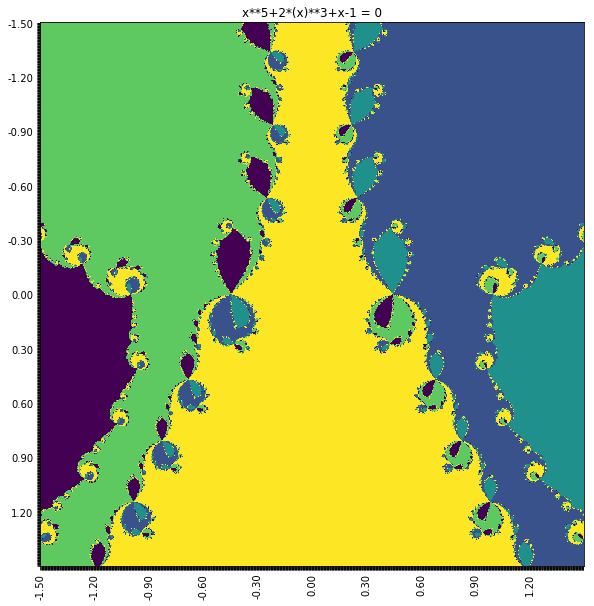

CPU times: user 29.4 s, sys: 4.5 s, total: 33.9 s
Wall time: 34 s


In [57]:
%%time
a = func('x**5+2*(x)**3+x-1','5*x**4+6*(x)**2+1') # Несмотря на ошибку в формуле производной сходимость хорошая
a.findingroots()
image=sets_of_roots_musk(a,xmin=-1.5, xmax=1.5, ymin=-1.5, ymax=1.5, xpoints=900, ypoints=900)
plotimage(*image)
